In [102]:
import numpy as np
import pandas as pd
import rustworkx as rx
import networkx as nx
import matplotlib.pyplot as plt
import ipywidgets as widgets
from tests_and_graphing import *

In [103]:
def draw_graph(A:np.ndarray, group_labels=None):
    n = A.shape[0]
    G = nx.from_numpy_array(A, create_using=nx.Graph)
    pos = nx.spring_layout(G)
    plt.figure(figsize=(6, 6))
    if group_labels is None:
        nx.draw(G, pos=pos, with_labels=False, node_color="lightblue", edge_color="black")
    else:
        unique_groups = list(set(group_labels))
        colors = plt.cm.get_cmap("tab10", len(unique_groups))
        color_map = {group: colors(i) for i, group in enumerate(unique_groups)}
        node_colors = [color_map[group_labels[node]] for node in G.nodes]
        print(node_colors)
        nx.draw(G, pos=pos, with_labels=False, node_color=node_colors, edge_color="black")

# graph structure

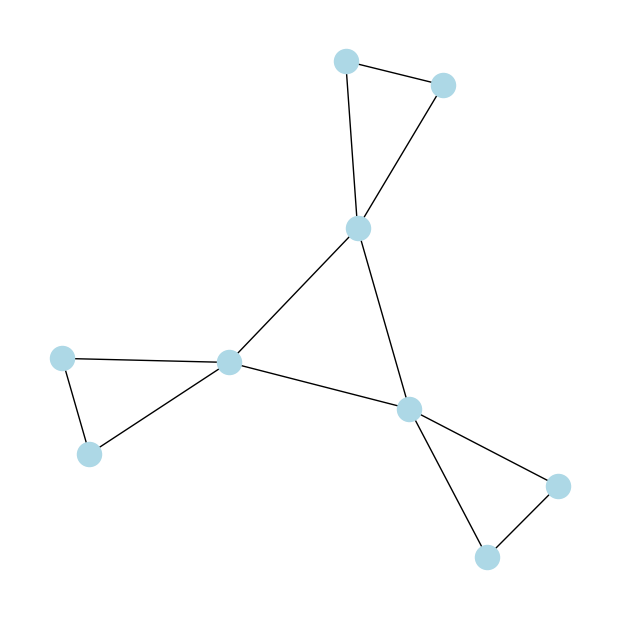

In [104]:
k = 3

AL = {
    0: [1,2,3,6],
    1: [0,2],
    2: [0,1],
    3: [4,5,0,6],
    4: [3,5],
    5: [3,4],
    6: [7,8,0,3],
    7: [6,8],
    8: [6,7]
}

# Get the adjacency matrix as a NumPy array
G = nx.from_dict_of_lists(AL)
A = nx.to_numpy_array(G)
D = np.diag(np.sum(A, axis=0)) #find the degree of each node
m, n = A.shape
draw_graph(A)

# Doing an SVD decomposition on the |L|= D + A

In [105]:
L_ABS = D + A
U, S, V = np.linalg.svd(L_ABS)
S = np.diag(S)
U_k = U[:,0:k]
S_k = S[0:k,0:k]
V_k = V[:k,:]

print(np.round(U_k @ S_k @ V_k))
print(np.round(U_k, decimals = 3))
print(np.round(V_k, decimals=3))
print(np.round(V, decimals = 3))

[[ 3.  2.  2.  1.  0.  0.  1.  0.  0.]
 [ 2.  1.  1.  0. -0. -0.  0. -0. -0.]
 [ 2.  1.  1.  0. -0. -0.  0. -0. -0.]
 [ 1.  0.  0.  3.  2.  2.  1.  0.  0.]
 [ 0. -0. -0.  2.  1.  1.  0. -0. -0.]
 [ 0. -0. -0.  2.  1.  1.  0. -0. -0.]
 [ 1.  0.  0.  1.  0.  0.  3.  2.  2.]
 [ 0. -0. -0.  0. -0. -0.  2.  1.  1.]
 [ 0. -0. -0.  0. -0. -0.  2.  1.  1.]]
[[-0.537 -0.     0.577]
 [-0.151 -0.     0.408]
 [-0.151 -0.     0.408]
 [-0.537 -0.5   -0.289]
 [-0.151 -0.354 -0.204]
 [-0.151 -0.354 -0.204]
 [-0.537  0.5   -0.289]
 [-0.151  0.354 -0.204]
 [-0.151  0.354 -0.204]]
[[-0.537 -0.151 -0.151 -0.537 -0.151 -0.151 -0.537 -0.151 -0.151]
 [ 0.    -0.     0.    -0.5   -0.354 -0.354  0.5    0.354  0.354]
 [ 0.577  0.408  0.408 -0.289 -0.204 -0.204 -0.289 -0.204 -0.204]]
[[-0.537 -0.151 -0.151 -0.537 -0.151 -0.151 -0.537 -0.151 -0.151]
 [ 0.    -0.     0.    -0.5   -0.354 -0.354  0.5    0.354  0.354]
 [ 0.577  0.408  0.408 -0.289 -0.204 -0.204 -0.289 -0.204 -0.204]
 [ 0.213 -0.379 -0.379  0.213 -0.3

In [106]:
print(L_ABS)

[[4. 1. 1. 1. 0. 0. 1. 0. 0.]
 [1. 2. 1. 0. 0. 0. 0. 0. 0.]
 [1. 1. 2. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 4. 1. 1. 1. 0. 0.]
 [0. 0. 0. 1. 2. 1. 0. 0. 0.]
 [0. 0. 0. 1. 1. 2. 0. 0. 0.]
 [1. 0. 0. 1. 0. 0. 4. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 2. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 2.]]


# Compute cosine matrix

In [107]:
CM = cosine_similarity(L_ABS, k)
print(np.round(CM, decimals = 3))


[[ 1.     0.904  0.904  0.484  0.133  0.133  0.484  0.133  0.133]
 [ 0.904  1.     1.     0.133 -0.153 -0.153  0.133 -0.153 -0.153]
 [ 0.904  1.     1.     0.133 -0.153 -0.153  0.133 -0.153 -0.153]
 [ 0.484  0.133  0.133  1.     0.904  0.904  0.484  0.133  0.133]
 [ 0.133 -0.153 -0.153  0.904  1.     1.     0.133 -0.153 -0.153]
 [ 0.133 -0.153 -0.153  0.904  1.     1.     0.133 -0.153 -0.153]
 [ 0.484  0.133  0.133  0.484  0.133  0.133  1.     0.904  0.904]
 [ 0.133 -0.153 -0.153  0.133 -0.153 -0.153  0.904  1.     1.   ]
 [ 0.133 -0.153 -0.153  0.133 -0.153 -0.153  0.904  1.     1.   ]]


# Reorder cosine matrix

In [108]:
INDEX = [] # global reordering index
CM_COPY = CM.copy()
indices = list(range(0,CM.shape[1]))
while(len(indices) > 1):
    # sort by cosine similarity
    similarity_list = CM_COPY[0,:]
    new_indices = np.argsort(similarity_list)[::-1]
    
    # rearrange matrix
    indices = [indices[i] for i in new_indices]
    CM_COPY = CM_COPY[np.ix_(new_indices,new_indices)]

    # remove and update
    INDEX.append(indices[0])
    indices.pop(0)
    CM_COPY = CM_COPY[1:,1:]
INDEX.append(indices[0])
del CM_COPY
print(INDEX)
CM_REORDERED = CM[np.ix_(INDEX, INDEX)]
CM_REORDERED

# this only mismatches the paper's example because vertex 2 is exactly similar to vertex 0 so their ordering doesnt matter

[0, 2, 1, 3, 4, 5, 6, 8, 7]


array([[ 1.        ,  0.9036824 ,  0.9036824 ,  0.4842931 ,  0.13256715,
         0.13256715,  0.4842931 ,  0.13256715,  0.13256715],
       [ 0.9036824 ,  1.        ,  1.        ,  0.13256715, -0.15301686,
        -0.15301686,  0.13256715, -0.15301686, -0.15301686],
       [ 0.9036824 ,  1.        ,  1.        ,  0.13256715, -0.15301686,
        -0.15301686,  0.13256715, -0.15301686, -0.15301686],
       [ 0.4842931 ,  0.13256715,  0.13256715,  1.        ,  0.9036824 ,
         0.9036824 ,  0.4842931 ,  0.13256715,  0.13256715],
       [ 0.13256715, -0.15301686, -0.15301686,  0.9036824 ,  1.        ,
         1.        ,  0.13256715, -0.15301686, -0.15301686],
       [ 0.13256715, -0.15301686, -0.15301686,  0.9036824 ,  1.        ,
         1.        ,  0.13256715, -0.15301686, -0.15301686],
       [ 0.4842931 ,  0.13256715,  0.13256715,  0.4842931 ,  0.13256715,
         0.13256715,  1.        ,  0.9036824 ,  0.9036824 ],
       [ 0.13256715, -0.15301686, -0.15301686,  0.13256715, -0

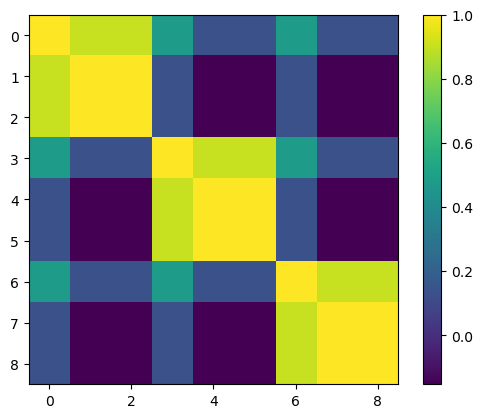

In [109]:
import matplotlib.pyplot as plt

plt.imshow(CM_REORDERED, cmap='viridis')
plt.colorbar()
plt.show()

In [110]:
print(community_detection(CM_REORDERED, .9))

print(community_strengths(CM_REORDERED, .9, ord = 'fro'))

print(community_strengths(CM_REORDERED, .9, ord = 2))

[slice(0, 3, None), slice(3, 6, None), slice(6, 9, None)]
[np.float64(0.032105865178867536), np.float64(0.032105865178867064), np.float64(0.032105865178866995)]
[np.float64(0.022702274983838366), np.float64(0.022702274983837974), np.float64(0.022702274983837922)]
